<a href="https://colab.research.google.com/github/Nandhini-ds/Loan-Default-Prediction-using-EDA-and-Logistic-Regression/blob/main/LoanTap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

LoanTap aims to enhance its underwriting process by leveraging data-driven insights to improve credit risk assessment for Personal Loans. The goal of this case study is to analyze customer-level attributes and build a predictive model to determine whether an applicant is eligible for a personal loan or not.

If the applicant is found eligible, the model should also help recommend appropriate repayment terms — including loan duration and repayment schedule — that balance business profitability with customer affordability.

This will support LoanTap in reducing default risk, improving loan approval accuracy, and ensuring sustainable lending practices.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("logistic_regression.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#**Basis Analysis of Data**

In [ ]:
# Shape
df.shape

(396030, 27)

In [ ]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicate records in the dataset.

#**Descriptive Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


#Insights

*  Applicants loan amount ranges from **500 to 40,000**.

*  The annual income of the applicants ranges from **0 to 8,706,582**. About 50% of the applicants earn below **64,000**.

*  Among all the variables, loan amount, annual income, and revolving balance show a large difference between their mean and median values, indicating the presence of outliers.

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


#Insights

*  This dataset contains two unique loan terms, out of which the **36-month term** is more frequently preferred by applicants.

*  Among all the grades assigned by LoanTap, **grade B** appears most frequently. Similarly, within the subgrades, B3 is the most common.

*  Most of the applicants have more than **10 years** of work experience.

*  Half of the applicants homes are under mortgage.

*  Most of the loan applications have verified.

*  Most of the applicants have repaid their loan amount.

*  The majority of applicants are applying for personal loans for **debt consolidation** or to repay their existing debts.

*  For most applicants, LoanTap allocates loans using a **fractional method**.

*  About **99%** of the applicants apply for personal loans as **individuals**.



**Checking missing values**

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
missing_per = (df.isnull().mean()*100)
missing_per = missing_per[missing_per>0]
missing_per

,0
emp_title,5.789208
emp_length,4.621115
title,0.443401
revol_util,0.069692
mort_acc,9.543469
pub_rec_bankruptcies,0.135091


**Observation**

There are six columns with missing values. Since the percentage of missing values is greater than the threshold value, we can fill them using imputation methods to retain their impact on the analysis.

**Handling Missing Values**

In [ ]:
tap_df  = df.copy()

In [ ]:
tap_df['emp_title'] = tap_df['emp_title'].fillna(tap_df['emp_title'].mode()[0])
tap_df['emp_length'] = tap_df['emp_length'].fillna(tap_df['emp_length'].mode()[0])
tap_df['mort_acc'] = tap_df['mort_acc'].fillna(round(tap_df['mort_acc'].mean()))
tap_df['revol_util'] = tap_df['revol_util'].fillna(tap_df['revol_util'].median())
tap_df['pub_rec_bankruptcies'] = tap_df['pub_rec_bankruptcies'].fillna(0)

In [ ]:
tap_df.nunique()

,0
loan_amnt,1397
term,2
int_rate,566
installment,55706
grade,7
sub_grade,35
emp_title,173105
emp_length,11
home_ownership,6
annual_inc,27197


**Data Type Conversion**

In [ ]:
category_col = ['term','grade','home_ownership','verification_status','loan_status','purpose','initial_list_status']
for col in category_col:
  df[col] = df[col].astype('category')

tap_df['issue_d'] = pd.to_datetime(tap_df['issue_d'],format = '%b-%Y')

**Data Cleaning**

In [ ]:
def simplify_title(emp_title):
     emp_title = str(emp_title).lower().strip()

     if 'manager' in emp_title:
        return 'Manager'
     elif 'teacher' in emp_title:
      return 'Teacher'
     elif 'driver' in emp_title or 'truck' in emp_title:
        return 'Driver'
     elif 'registered nurse' in emp_title or 'rn' in emp_title or 'nurse' in emp_title:
        return 'Nurse'
     else:
        return emp_title

In [ ]:
tap_df['emp_title'] = tap_df['emp_title'].apply(simplify_title)

#Feature enginnering

In [ ]:
df['address'].head()

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
tap_df[['state','zipcode']]=tap_df['address'] .apply(lambda x: pd.Series([x[-8:-6],x[-5:]]))


In [ ]:
tap_df['pub_rec'] = tap_df['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
tap_df['pub_rec_bankruptcies']=tap_df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)
tap_df['mort_acc']=tap_df['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0 )

In [ ]:
#issue_date
tap_df['year'] = pd.to_datetime(tap_df['issue_d']).dt.year
tap_df['month'] = pd.to_datetime(tap_df['issue_d']).dt.month

#earliest_cr_line
current_year = pd.to_datetime('today').year
tap_df['credit_history_years'] = current_year - pd.to_datetime(tap_df['earliest_cr_line'],
                                                               format='%b-%Y').dt.year


#**Exploratory Data Analysis (EDA)**

#**Outlier Detection**

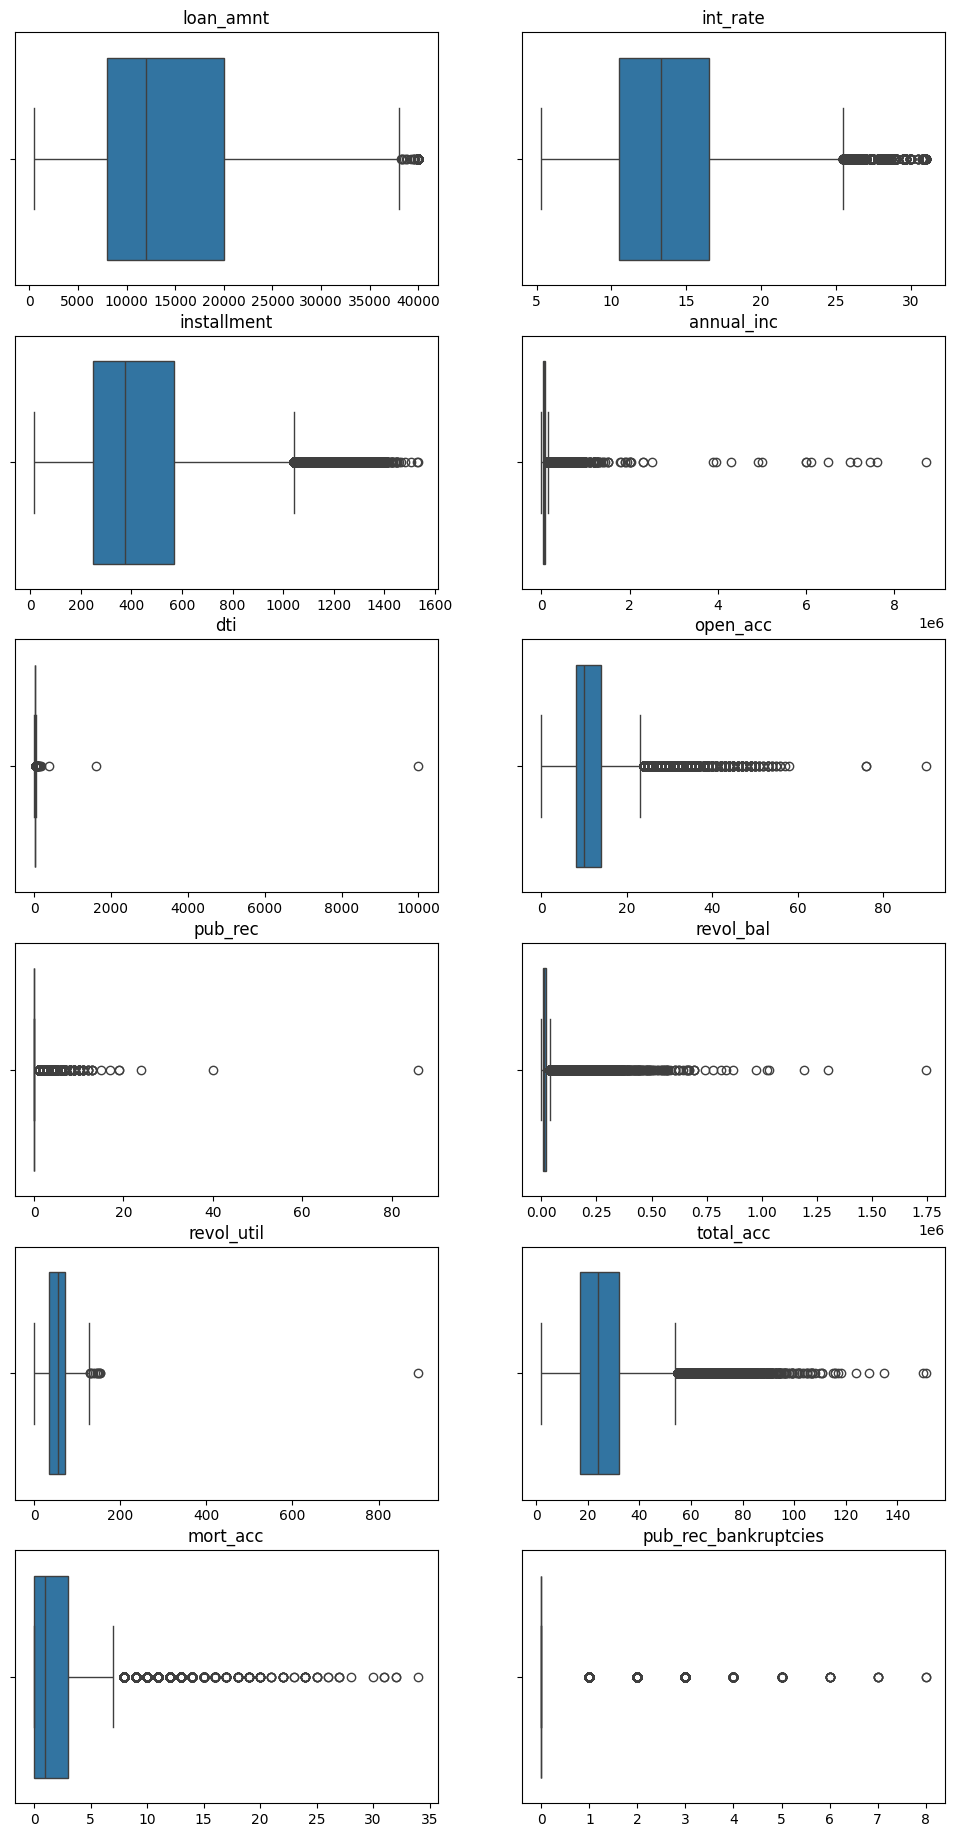

In [ ]:
num_col = df.select_dtypes(include = 'number').columns

plt.figure(figsize=(12,23))
for i, col in enumerate(num_col,1):
  plt.subplot(6,2,i)
  sns.boxplot(x=df[col])
  plt.title(col)
  plt.xlabel("")

plt.show()



#Insights

*  The boxplot shows that all numerical variables contain outliers.

*  These outliers can be handled using the IQR (Interquartile Range) method to remove or cap extreme values.

**IQR method**

In [ ]:
outlier = df.select_dtypes(include = 'number')
iqr = outlier.quantile(0.75)-outlier.quantile(0.25)
lower_limit = outlier.quantile(0.25) - iqr * 1.5
upper_limit = outlier.quantile(0.75) + iqr * 1.5

for col in outlier.columns:
     num_of_outlier = ((outlier[col] < lower_limit[col]) | (outlier[col] > upper_limit[col])).sum()
     print(f"{col}: {num_of_outlier} outliers")


loan_amnt: 191 outliers
int_rate: 3777 outliers
installment: 11250 outliers
annual_inc: 16700 outliers
dti: 275 outliers
open_acc: 10307 outliers
pub_rec: 57758 outliers
revol_bal: 21259 outliers
revol_util: 12 outliers
total_acc: 8499 outliers
mort_acc: 6843 outliers
pub_rec_bankruptcies: 45115 outliers


#After removing outliers

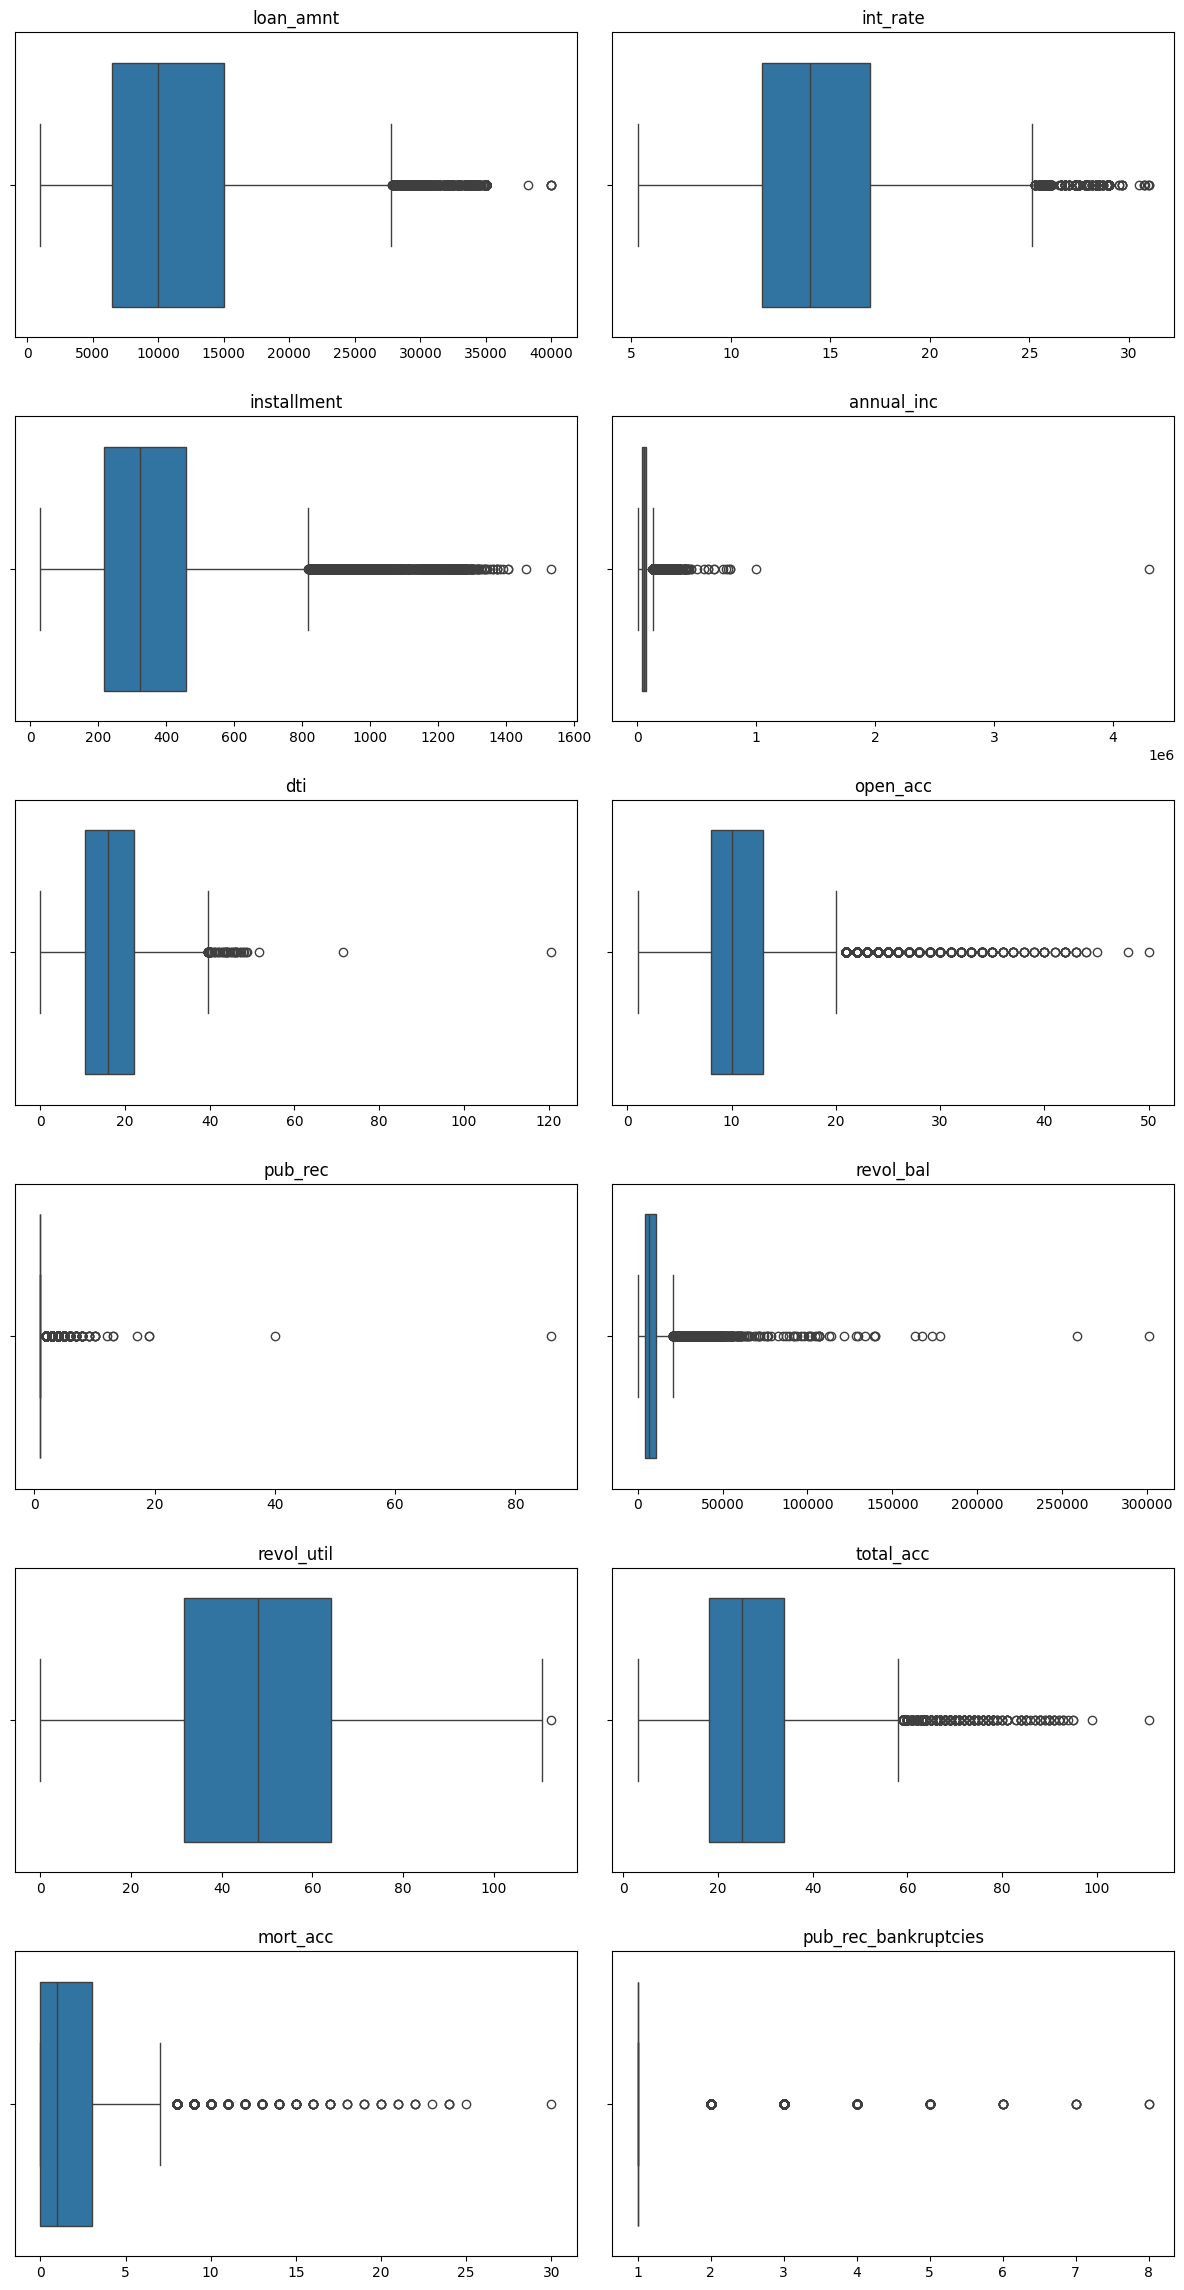

In [ ]:
new_df  = outlier[(outlier[col]  > lower_limit[col]) | (outlier[col] < upper_limit[col])]
plt.figure(figsize=(12,23))
for i, col in enumerate(new_df.columns, 1):
    plt.subplot(6,2, i)
    sns.boxplot(x=new_df[col])
    plt.title(col)
    plt.xlabel("")
plt.tight_layout()
plt.show()

#**Univariate Analysis**

# Numerical Values

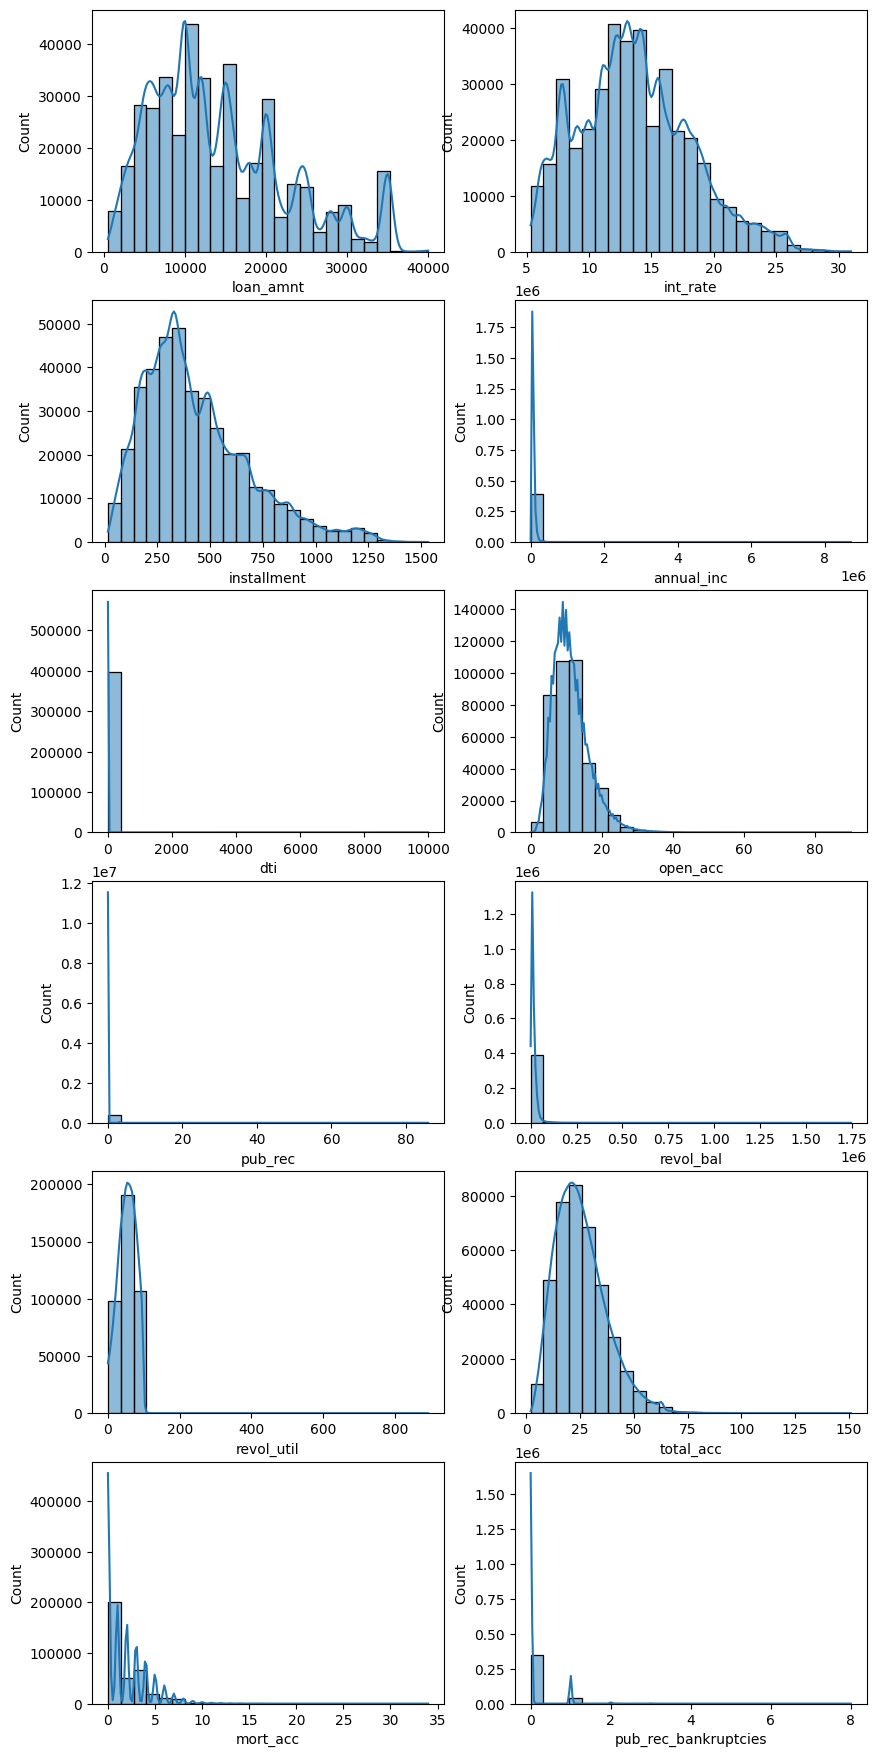

In [ ]:
num_col = tap_df.select_dtypes(include = 'number').columns

plt.figure(figsize=(10,22))
for i, col in enumerate(num_col,1):
  plt.subplot(6,2,i)
  sns.histplot(tap_df[col],bins=25,kde=True)
plt.show()


#Insights

*  The loan amount is right-skewed, meaning most applicants borrow small amounts. The multiple peaks show that certain loan amounts are requested by many applicants.

*  Annual income, dti and revolving balance are  right skewed with heavily tailed.

*  Interest rate and installment are moderately right-skewed, indicating that most applicants have loans with lower interest rates and smaller installment amounts.

#Categorical Variable Distribution

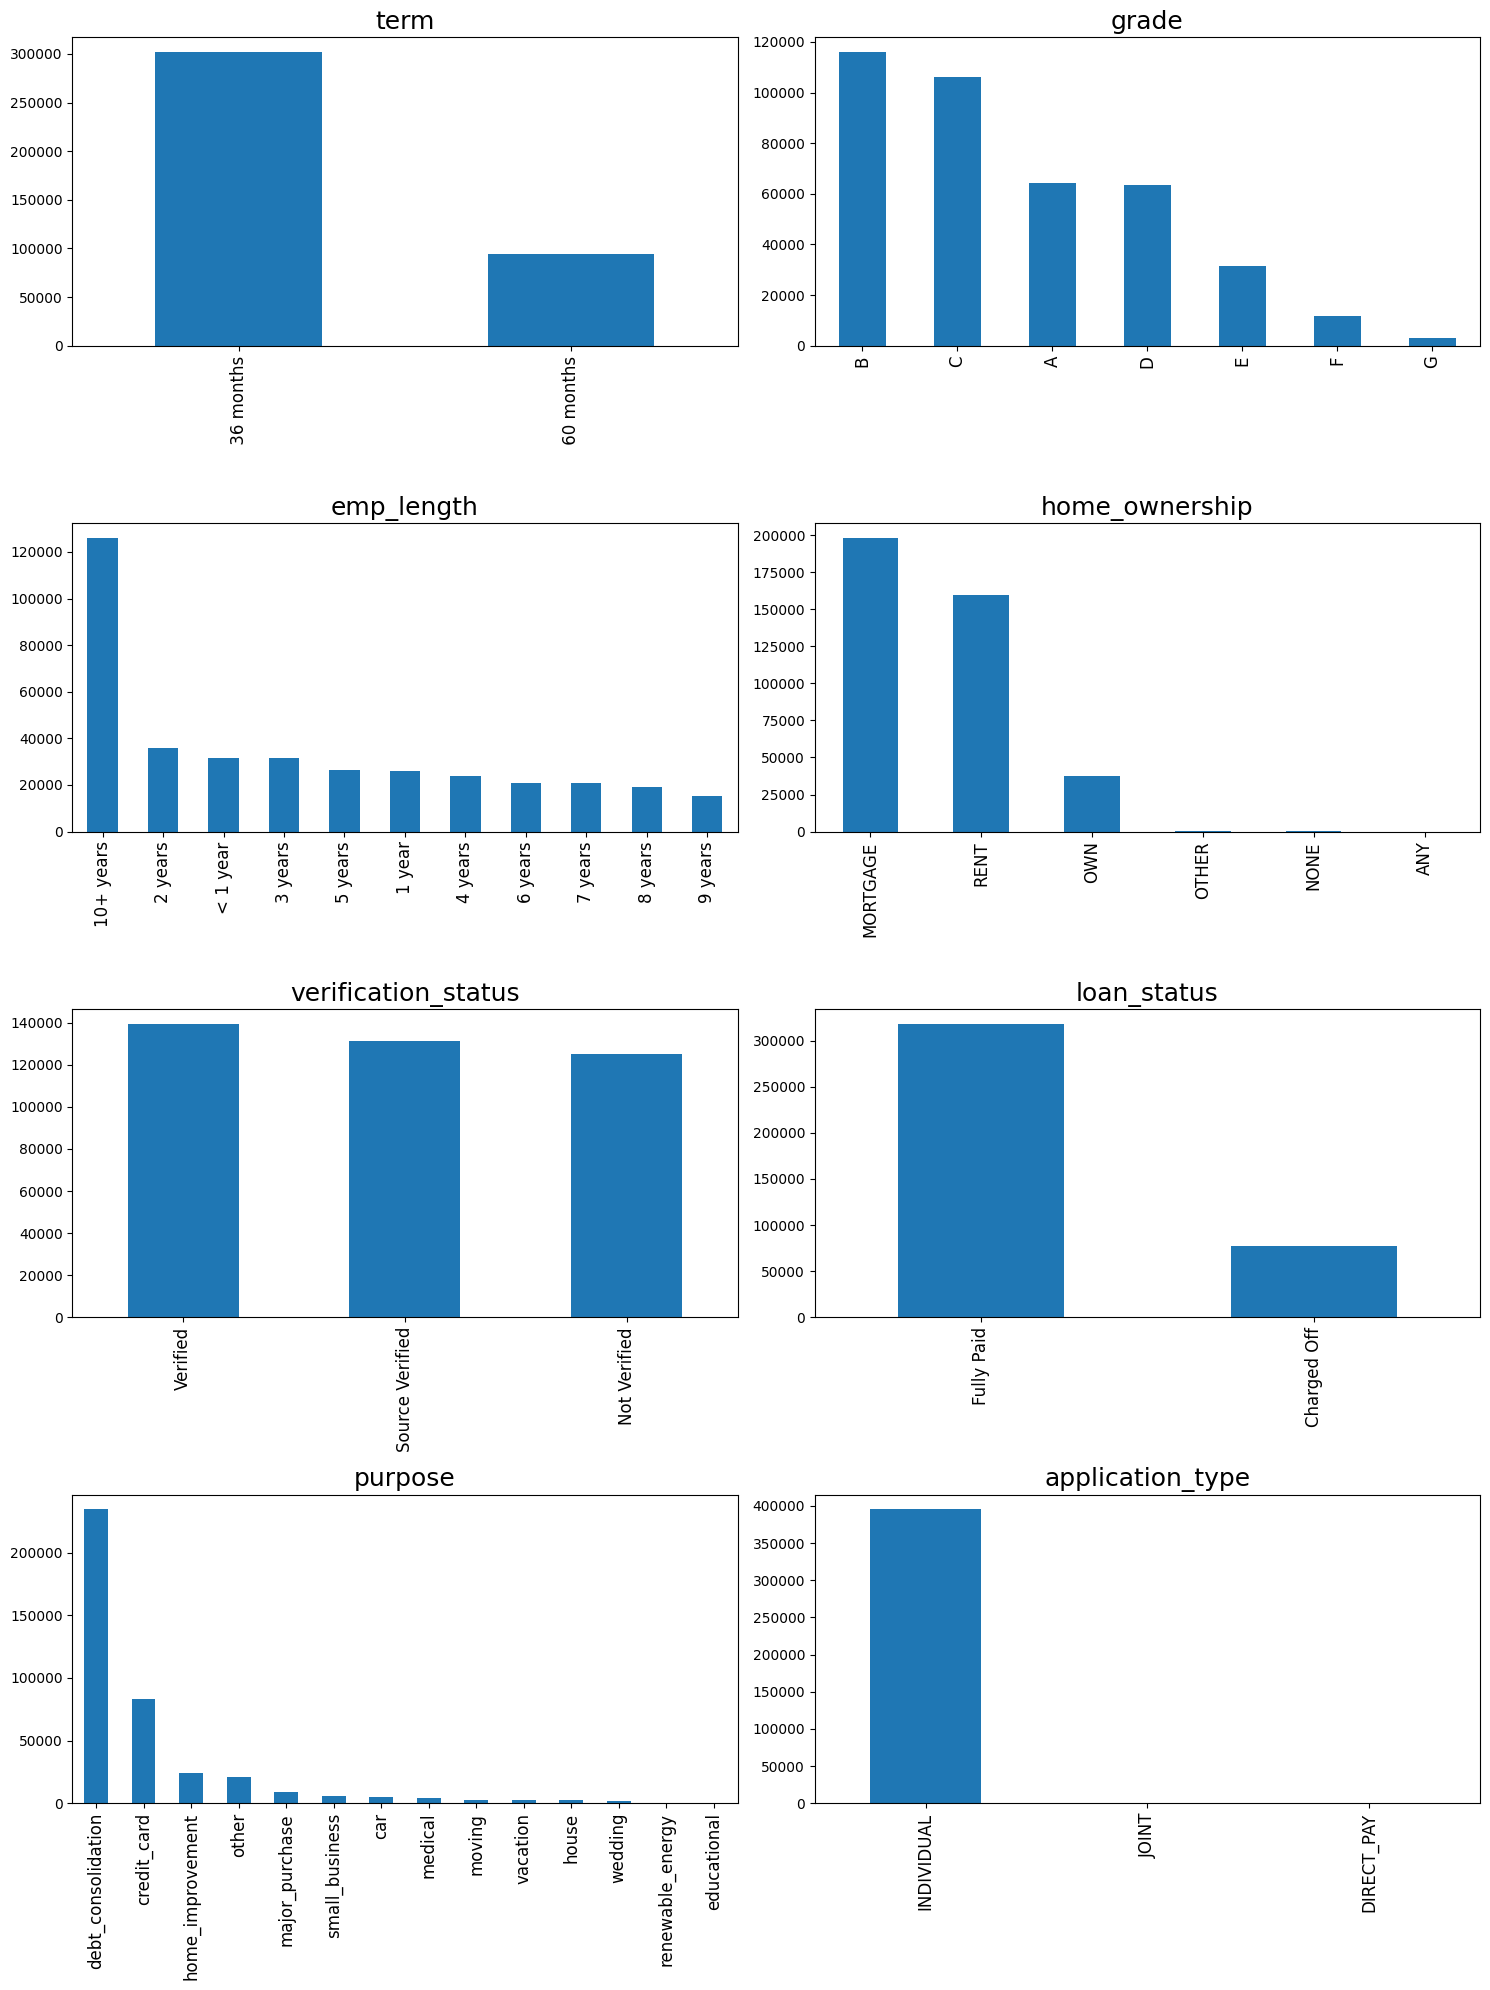

In [ ]:
bar = ['term','grade','emp_length','home_ownership','verification_status','loan_status',
       'purpose','application_type']
fig, axes = plt.subplots(4,2,figsize=(15,20))
axes = axes.flatten()
for i,col in enumerate(bar):
   tap_df[col].value_counts().plot(kind='bar',ax=axes[i])
   axes[i].set_title(col,fontsize=18)
   axes[i].set_xlabel('')
   axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

#Insights

*  Most applicants go for a 36-month loan term rather than taking the 60-month term.

*  Most applicants fall into Grade B, slightly more than Grade C, while applicants with G grade are significantly very very low.

*  Applicants with more than 10 years of experience are significantly higher, roughly three times compared to other experience levels.

*  The majority of applicants are under mortgage, while those who own a home are significantly fewer.

*  All three verification statuses are relatively equal.

*  As seen earlier, a significant proportion of applicants repaid their loans compared to charge-offs.

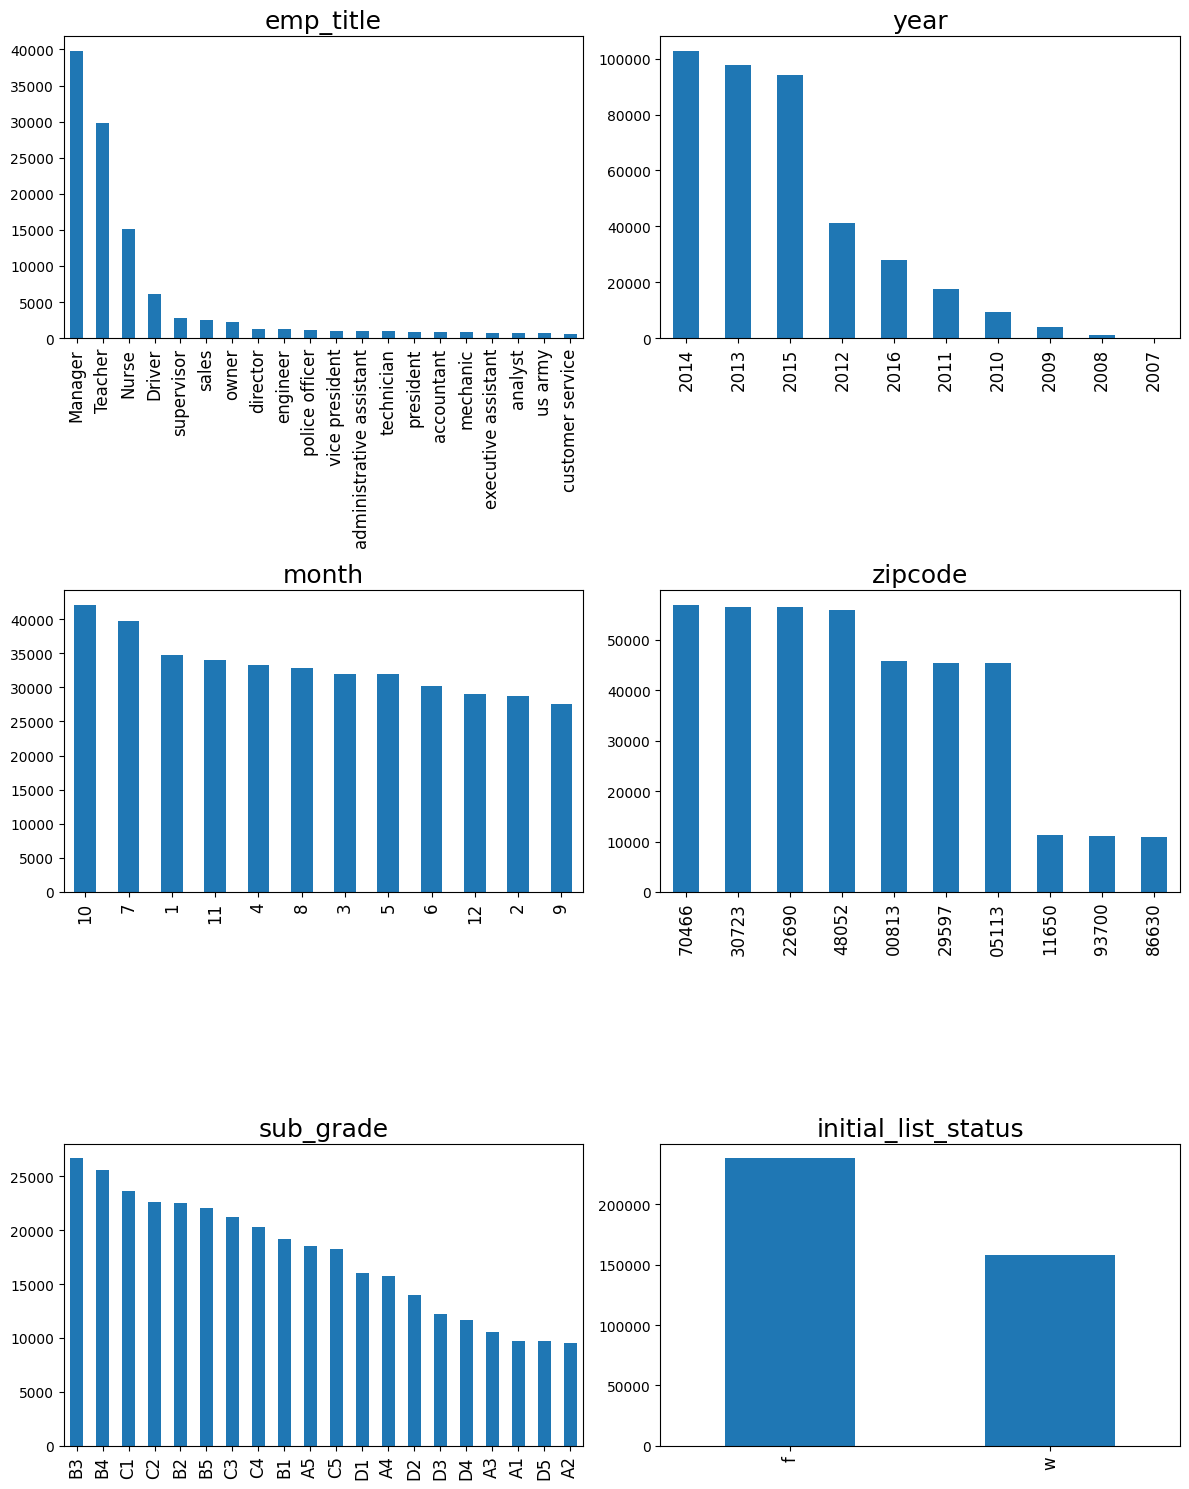

In [ ]:
val = ['emp_title','year','month','zipcode','sub_grade','initial_list_status']
fig,axes = plt.subplots(3,2, figsize=(12,15))
axes = axes.flatten()
for i,col in enumerate(val):
  tap_df[col].value_counts().head(20).plot(kind='bar',ax = axes[i])
  axes[i].set_title(col,fontsize=18)
  axes[i].set_xlabel('')
  axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()

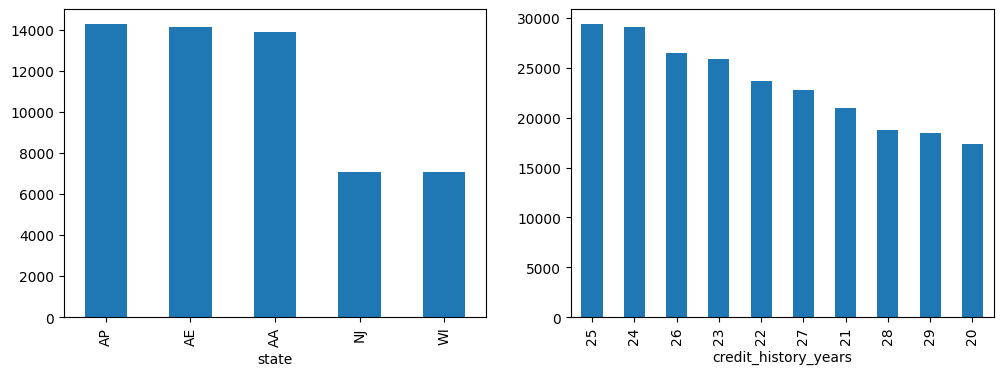

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
tap_df['state'].value_counts().head().plot(kind='bar')

plt.subplot(1,2,2)
tap_df['credit_history_years'].value_counts().head(10).plot(kind='bar')
plt.show()

#Insights

*  The majority of applicants hold **managerial-level** positions.

*  The second most common profession is **Teacher, followed by Nurse**, while other professions have significantly fewer applicants.

*  Most loans were issued in **2014**, particularly in the month of **October**  followed by 2013 and 2015.

*  Applicants with **subgrades B3 and B4** represent the highest categories assigned by Loan Tap.

*  States **AP, AE, and AL** have the highest number of applicants compared to other states.

*  Most applicants have **25 years** of credit history, indicating they are experienced borrowers with a strong track record in managing loans.

#**Correlation Analysis**

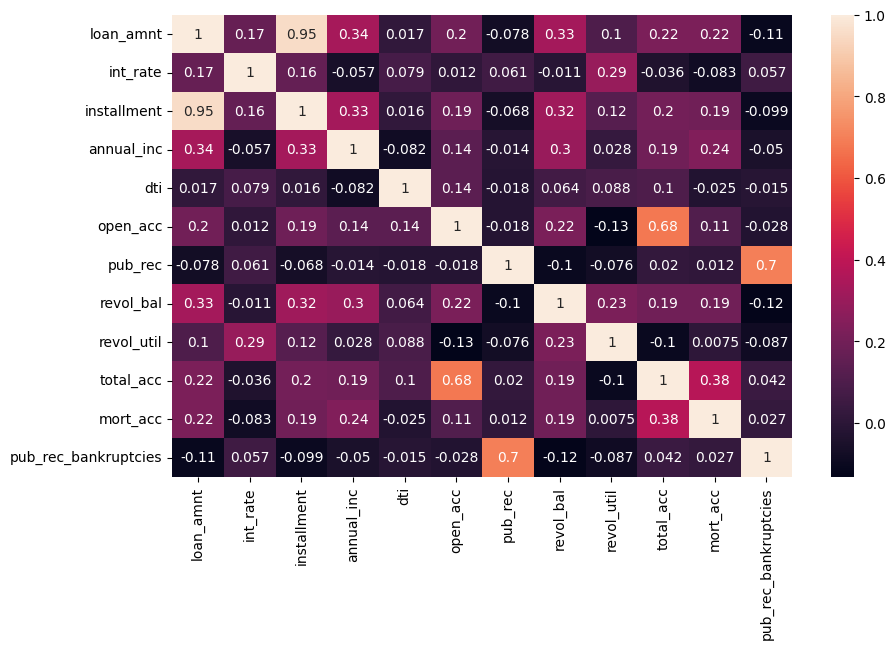

In [ ]:
cor = tap_df.select_dtypes(include = 'number')
plt.figure(figsize=(10,6))
sns.heatmap(cor.corr(), annot =True)
plt.show()

#Insights

*  There is a very strong positive correlation between loan amount and installment. As the loan amount increases, the installment amount also increases.

*  There is a strong positive correlation between open accounts and total accounts. Applicants with more open accounts tend to have more total accounts, indicating higher potential liabilities.

*  pub_rec_bankruptcies and pub_rec show a strong positive correlation. Applicants with more bankruptcies tend to have more public records.

*   There is a weak positive correlation between interest rate and loan amount. This indicates that higher loan amounts are unlikely to significantly increase the interest rate.

#**Bivariate Analysis**

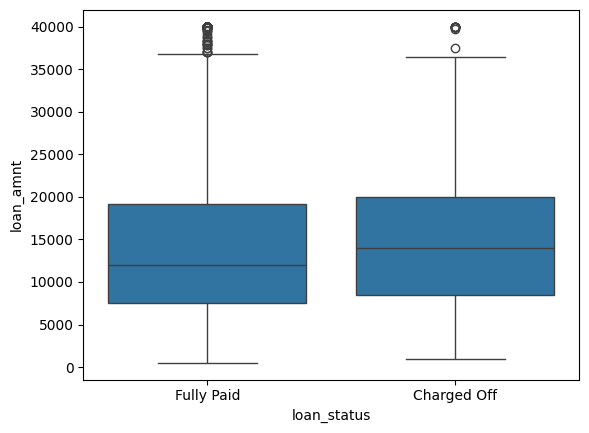

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=tap_df)
plt.show()

#Insights

*   The median loan amount for charged of loans is slightly higher than that for fully paid loans.

*  The IQR (box) represents the middle 50% of loan amounts and is almost similar for both categories.

*  Applicants in both categories have taken loan amounts ranging from small to large.

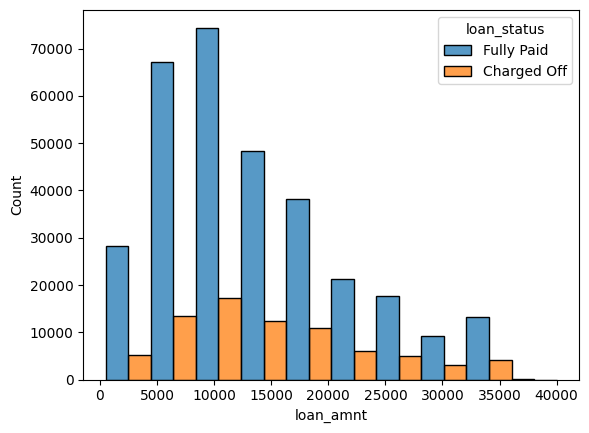

In [ ]:
sns.histplot(data=tap_df, x='loan_amnt', hue='loan_status', multiple='dodge',bins=10)
plt.show()

#Insights

*  Most of the applicants have repaid their loans across all ranges of loan amounts.

*  Applicants who have taken high loan amounts are significantly fewer compared to those with lower loan amounts.

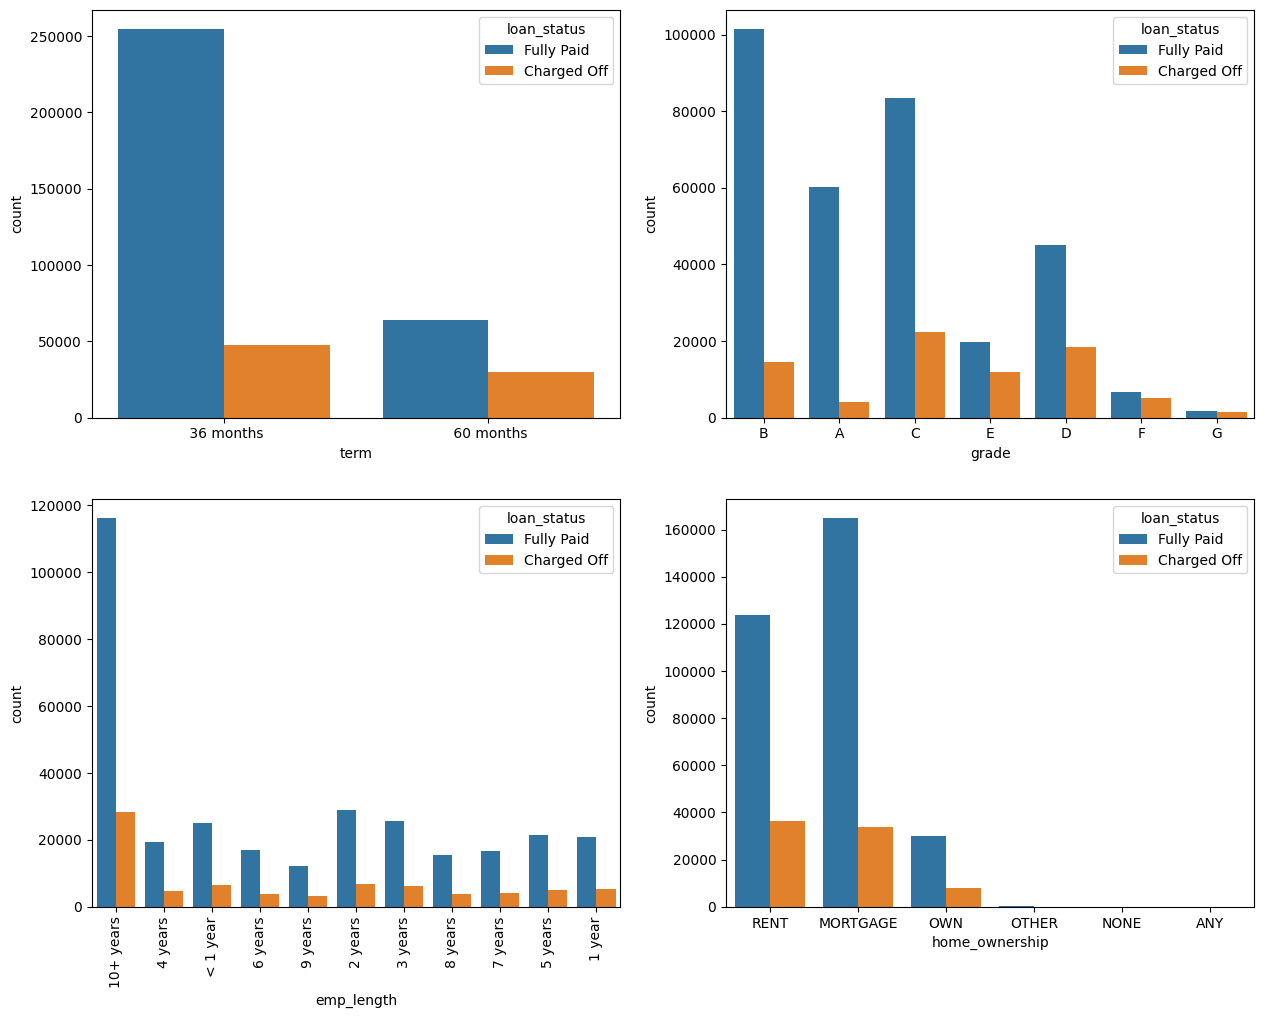

In [ ]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
sns.countplot(hue='loan_status', x='term', data=tap_df)

plt.subplot(3,2,2)
sns.countplot(hue='loan_status', x='grade', data=tap_df)

plt.subplot(3,2,3)
sns.countplot(hue='loan_status', x='emp_length', data=tap_df)
plt.xticks(rotation = 90)

plt.subplot(3,2,4)
sns.countplot(hue='loan_status', x='home_ownership', data=tap_df)
plt.show()

*  Applicants who have taken a **36-month** loan term have fully repaid their loan amount, while only a few applicants who have chosen a 60-month loan term have repaid their loans.

*  Across all experience levels, most applicants who have taken loans have repaid them, while only a few remain unpaid.

*  Applicants across all grades include both those who have repaid and those who are yet to repay their loans. A significant number of applicants in Grades B, C, and A have repaid their loans, while only a few remain unpaid.

*  Most applicants whose homes are under mortgage have repaid their loans, while only a few applicants with rented or mortgaged homes are yet to repay.

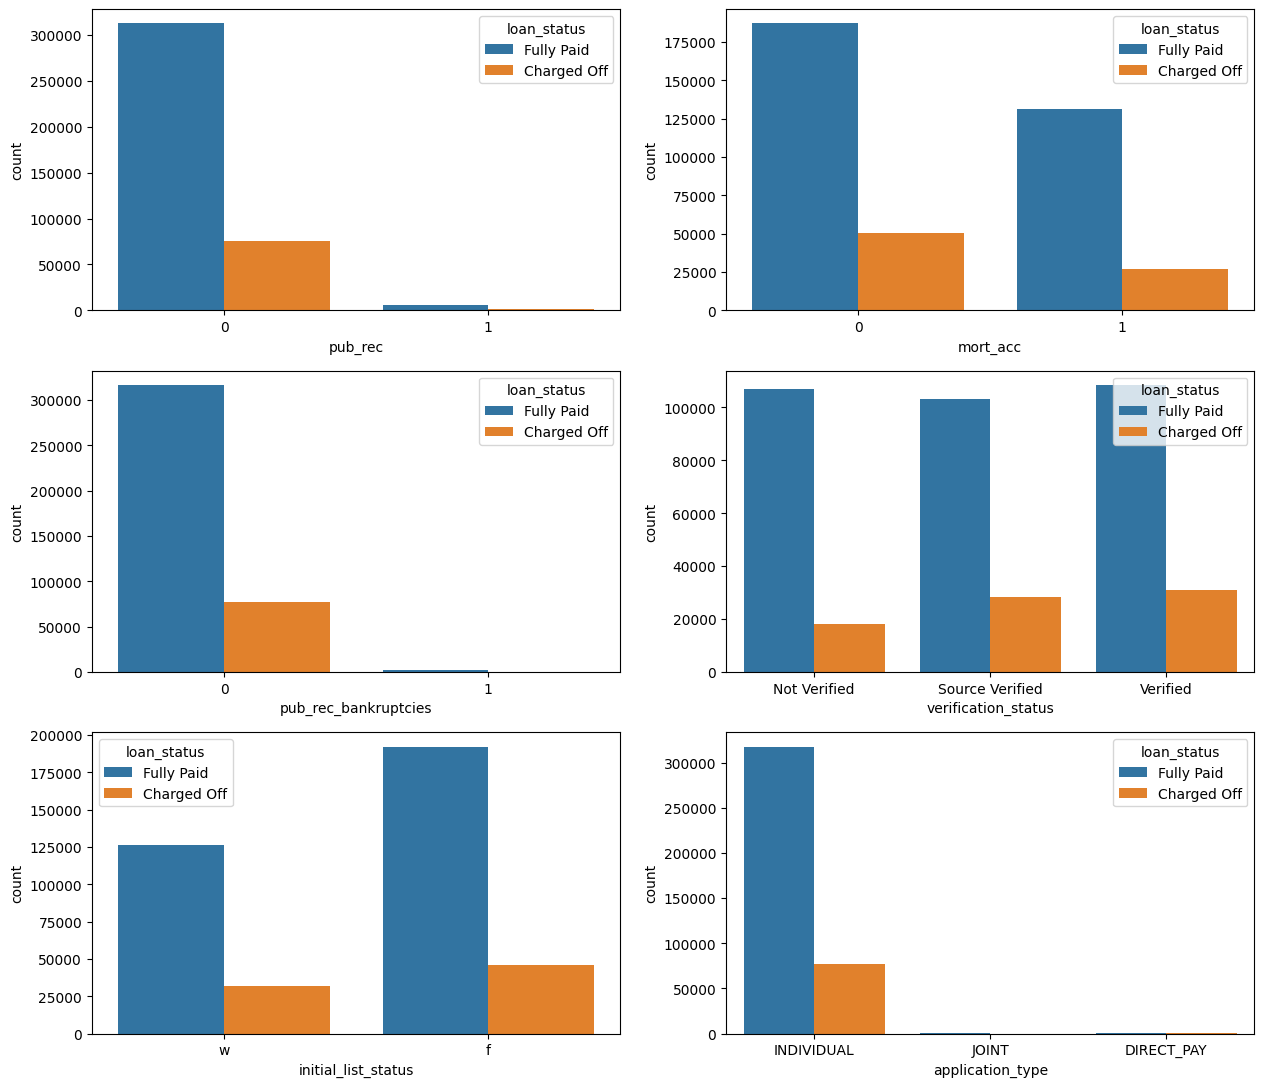

In [ ]:
plt.figure(figsize=(15,18))
plt.subplot(4,2,1)
sns.countplot(x='pub_rec', hue='loan_status', data=tap_df)

plt.subplot(4,2,2)
sns.countplot(hue='loan_status', x ='mort_acc',data=tap_df)

plt.subplot(4,2,3)
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=tap_df)

plt.subplot(4,2,4)
sns.countplot(x='verification_status', hue='loan_status', data=tap_df)

plt.subplot(4,2,5)
sns.countplot(x='initial_list_status', hue='loan_status', data=tap_df)

plt.subplot(4,2,6)
sns.countplot(x='application_type', hue='loan_status', data=tap_df)
plt.show()

#Insights

*  Applicants with no public records and no bankruptcies are more likely to repay their loans compared to those with public records or bankruptcies.

*  Applicants with no prior loans have fully repaid their loans more in number compared to applicants with more than one mortgage account.

*  Loan repayment does not vary significantly with verification status.

*   Applicants with an initial list status of **f** have repaid their loans in higher numbers compared to those with a status of **w**, although both categories include a small number of charged-off or unpaid loans.

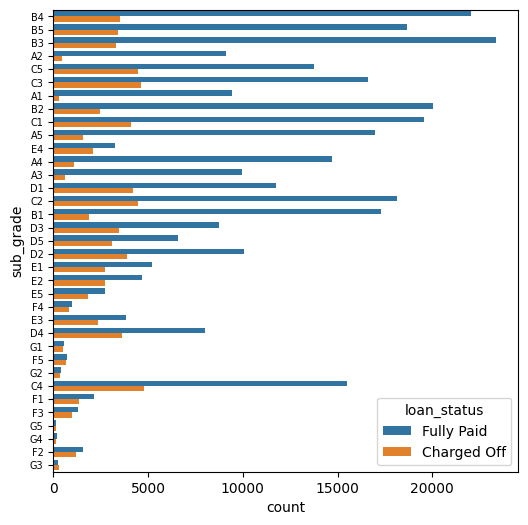

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(y='sub_grade', hue='loan_status', data=tap_df)
plt.yticks(fontsize=7)
plt.show()

#Insights

*  Applicants with subgrade **B3** have the highest number of fully repaid loans.

*  Applicants with subgrades belonging to Grades **B, C, and A** are more likely to repay their loan amounts.

*  Applicants under Grade D show a moderate number of repayments, whereas those in Grades **E and F** have significantly fewer fully repaid loans.

In [ ]:
group_df = tap_df.groupby(['loan_status','emp_title']).size().reset_index(name='count')
top = group_df.groupby('emp_title')['count'].sum().nlargest(11).index
final=group_df[group_df['emp_title'].isin(top)]

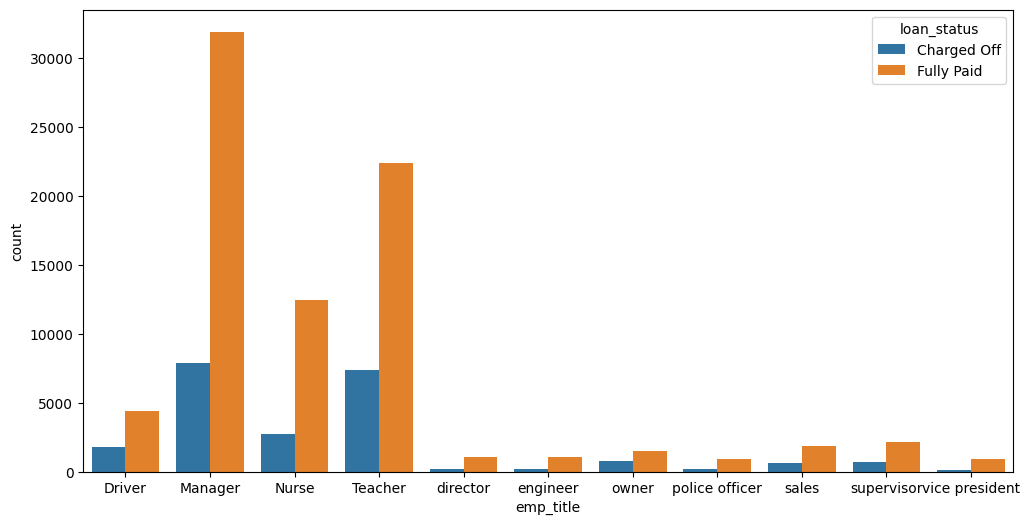

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=final,x='emp_title',y='count',hue='loan_status')
plt.show()

#Insights

*  Applicants in manager-level categories have a significantly higher count, followed by those in teacher categories.

*  Applicants who are nurses are the third most common in repaying loans, while other categories are significantly lower.

#Multicollinearity Check

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=tap_df.select_dtypes(include='number')
v_df =vif_df.drop(['pub_rec','mort_acc','pub_rec_bankruptcies','credit_history_years','year','month'],axis=1)
v_df = sm.add_constant(v_df)
vif = pd.DataFrame()
vif['Features'] = v_df.columns
vif['VIF'] = [variance_inflation_factor(v_df.values,i) for i in range(v_df.shape[1])]
vif


,Features,VIF
0,const,20.202240
1,loan_amnt,11.479974
2,int_rate,1.162815
3,installment,11.263812
4,annual_inc,1.224857
5,dti,1.047811
6,open_acc,1.960880
7,revol_bal,1.300824
8,revol_util,1.233193
9,total_acc,1.931199


#Insights

*  Loan amount and installment show high VIF values, indicating that they are highly correlated.

*   Due to this multicollinearity, both variables essentially carry the same information - each can explain the other.

*  Since loan amount is the more fundamental and interpretable feature, we can drop installment to avoid multicollinearity, stabilize the model, and improve interpretability.

In [ ]:
v_df = v_df.drop(columns=['installment'])
v_df = sm.add_constant(v_df)
vif = pd.DataFrame()
vif["Feature"] = v_df.columns
vif["VIF"] = [variance_inflation_factor(v_df.values, i) for i in range(v_df.shape[1])]
vif

,Feature,VIF
0,const,20.157184
1,loan_amnt,1.288497
2,int_rate,1.162123
3,annual_inc,1.223214
4,dti,1.047791
5,open_acc,1.956800
6,revol_bal,1.300265
7,revol_util,1.221055
8,total_acc,1.926137


*  After removing the **installment** feature, the VIF value for **loan_amnt** has reduced. After droping instalment thers is no multicoliniearity, so we can drop it

#Data Preparation for Modeling

In [ ]:
clean_df.shape

(31701, 27)

In [ ]:
final_df = clean_df.copy()

In [ ]:
final_df = final_df.drop(['installment'],axis=1)

In [ ]:
final_df = final_df.drop(['sub_grade','emp_title','issue_d','title',
               'earliest_cr_line','state','address'],axis=True)

In [ ]:
final_df['term'] = final_df['term'].str.split().str[0]

In [ ]:
def str_num(x):
    x = x.strip()
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    else:
        return int(x.split()[0])

In [ ]:
final_df['emp_length'] = final_df['emp_length'].apply(str_num)

In [ ]:
final_df['initial_list_status'] = final_df['initial_list_status'].map({'w':0, 'f':1})
final_df['loan_status'] = final_df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

#One Hot Encoding

In [ ]:
cat_cols = ['grade','home_ownership','verification_status',
                             'purpose','application_type','zipcode']
df_encoded = pd.get_dummies(final_df, columns=cat_cols, drop_first=True)

In [ ]:
bool_df=df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_df] = df_encoded [bool_df].astype(int)

In [ ]:
df_encoded.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,application_type_JOINT,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,10000.0,36,11.44,10,117000.0,0,26.24,16.0,0,36369.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,4,65000.0,0,22.05,17.0,0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,0,43057.0,0,12.79,13.0,0,11987.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,6,54000.0,0,2.60,6.0,0,5472.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,9,55000.0,1,33.95,13.0,0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
Y =df_encoded['loan_status']
X = df_encoded.drop(['loan_status'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape

((270888, 51), (270888,), (67723, 51))

#**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Scale numeric columns
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Convert scaled numeric arrays back to DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

# Combine with categorical columns
X_train_final = pd.concat([X_train_num_df, X_train[cat_cols]], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test[cat_cols]], axis=1)


#**Data Imbalance**

In [ ]:
Y_train.value_counts(normalize=True)*100

In [ ]:
proportion   loan_status
1            	80.55
0              19.45

**Observation**

*  The dataset is imbalanced,with approximately **80% of loans labeled as Fully Paid and 20% as Charged Off**. To address this, we can apply **SMOTE** (Synthetic Minority Over-sampling Technique) on the training set to create a balanced dataset.

#Balancing the Dataset Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(X_train_final, Y_train)

In [ ]:
y_train_res.value_counts(normalize=True)*100

,proportion
loan_status,
1,50.0
0,50.0


*  After applying SMOTE, both classes now have an equal number of samples.

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
y_train_pred = model.predict(x_train_res)
y_test_pred = model.predict(X_test_final)

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report,f1_score)
#Traning
print("Training Accuracy:",round(accuracy_score(y_train_res, y_train_pred),2))
print("Traning f1_score:",round(f1_score(y_train_res, y_train_pred),2))

# Testing
print("\nTesting Accuracy:",round(accuracy_score(Y_test, y_test_pred),2))
print("Testing f1_score:",round(f1_score(Y_test, y_test_pred),2))

Training Accuracy: 0.8
Traning f1_score: 0.81

Testing Accuracy: 0.79
Testing f1_score: 0.61


#Confusion Matrix

In [ ]:
cm = confusion_matrix(Y_test, y_test_pred)
cm

array([[42966, 11517],
       [ 2453, 10787]])

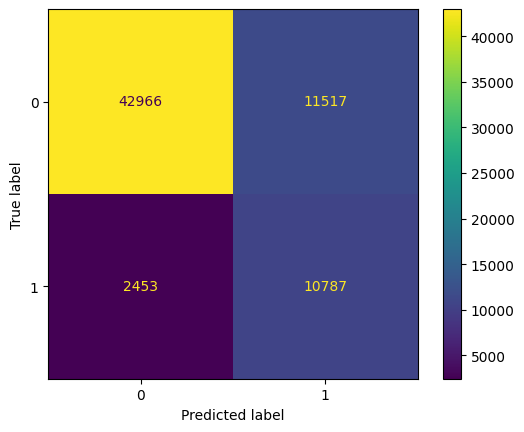

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#Insights

*  The confusion matrix confims that the dataset has a higher proportion of fully paid applicants **(TN = 42966)**.

*  The model correctly identifies **10787 unpaid applicants (TP)**. However, it misclassified 2453 unpaid applicants as fully paid (FN) and incorrectly predicted 11517 fully paid applicants as unpaid (FP).

#Classification Report

In [ ]:
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     54483
           1       0.48      0.81      0.61     13240

    accuracy                           0.79     67723
   macro avg       0.71      0.80      0.73     67723
weighted avg       0.86      0.79      0.81     67723



#Insights

*  The precision value (0.95) for the negative class (0) indicates the model's specificity rate — meaning that out of all customers the model predicted as fully paid, 95% were actually fully paid.

*  The low precision value for the positive class (unpaid = 1) indicates that out of all customers the model predicted as unpaid, only **48%** were actually unpaid. This also affects the **F1-score (0.61)** for the positive class, reflecting the trade-off between precision and recall.

*  The high **recall (79%, 80%)** for both classes indicate that the model can correctly identify a large proportion of actual customers in each class.
  


#ROC and AUC

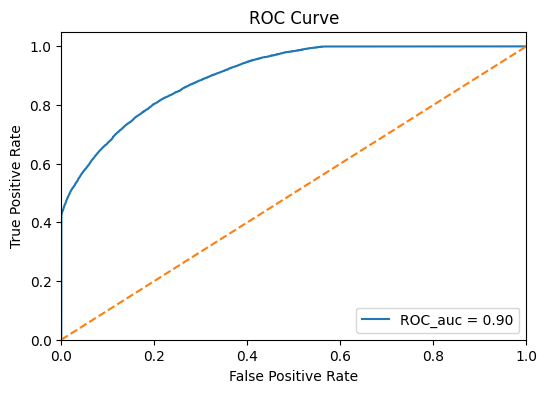

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
prob = model.predict_proba(X_test_final)[:,1]
fpr, tpr, thresholds =roc_curve(Y_test, prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label ='ROC_auc = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

print("Best Threshold:", best_threshold)
print("TPR at best threshold:", tpr[best_idx])
print("FPR at best threshold:", fpr[best_idx])

Best Threshold: 4.3450523020888814e-13
TPR at best threshold: 0.8029456193353475
FPR at best threshold: 0.19828203292770222


#Insights

*  The ROC curve shows an area under the curve **(AUC) of 0.90**, indicating good overall discrimination between the positive and negative classes.

*  Even though the classifier focuses more on the minority class,the high true positive rate **(TPR = 80%)** and low false positive rate **(FPR = 19.8%)** suggest that the model is correctly classifying both positive and negative classes.

*  However, due to the imbalance in the dataset, the ROC curve may be misleading. Therefore, it is recommended to check the PR curve rather than relying solely on ROC to get a more accurate evaluation of the model's performance on the minority class.

#Precision Recall Curve

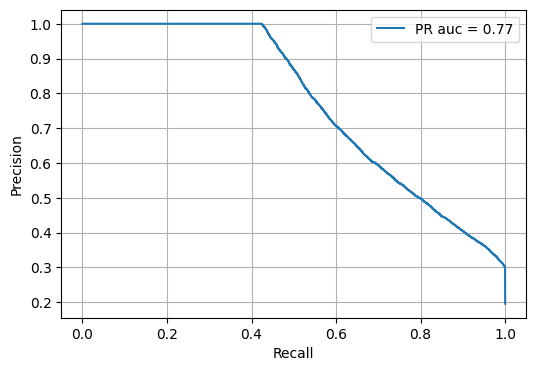

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, prob)
pr_auc = auc(recall,precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label = 'PR auc = %0.2f'% pr_auc)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

*  The Precision-Recall (PR) curve shows the trade-off between precision and recall at different classification thresholds.
*  The Precision-Recall (PR) curve covers **76%** of the area under the curve, which is higher than that of a random model. This indicates that the model performs better than random guessing, particularly for identifying the minority class (unpaid customers).


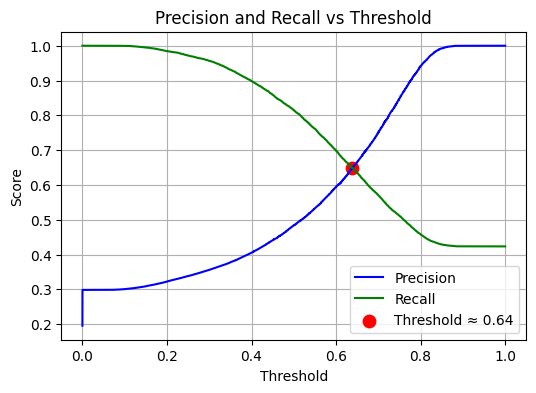

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')

idx = np.argmin(np.abs(precision[:-1] - recall[:-1]))
plt.scatter(thresholds[idx], precision[idx], color='red', s=80, label=f'Threshold ≈ {thresholds[idx]:.2f}')

plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

#Model Coefficients

In [ ]:
idx = index = X_train_final.columns
coef = pd.DataFrame(model.coef_.flatten(),columns=['Coefficients'],index=idx)
coef = coef.reset_index()
coef = coef.rename(columns={'index':'Feature'})
coef = coef.sort_values('Coefficients', ascending=False)
coef

,Feature,Coefficients
49,zipcode_93700,8.890728
42,zipcode_11650,8.889884
48,zipcode_86630,8.876485
47,zipcode_70466,3.823905
43,zipcode_22690,3.814407
45,zipcode_30723,3.806161
46,zipcode_48052,3.803729
15,grade_D,0.660255
14,grade_C,0.610149
16,grade_E,0.576166


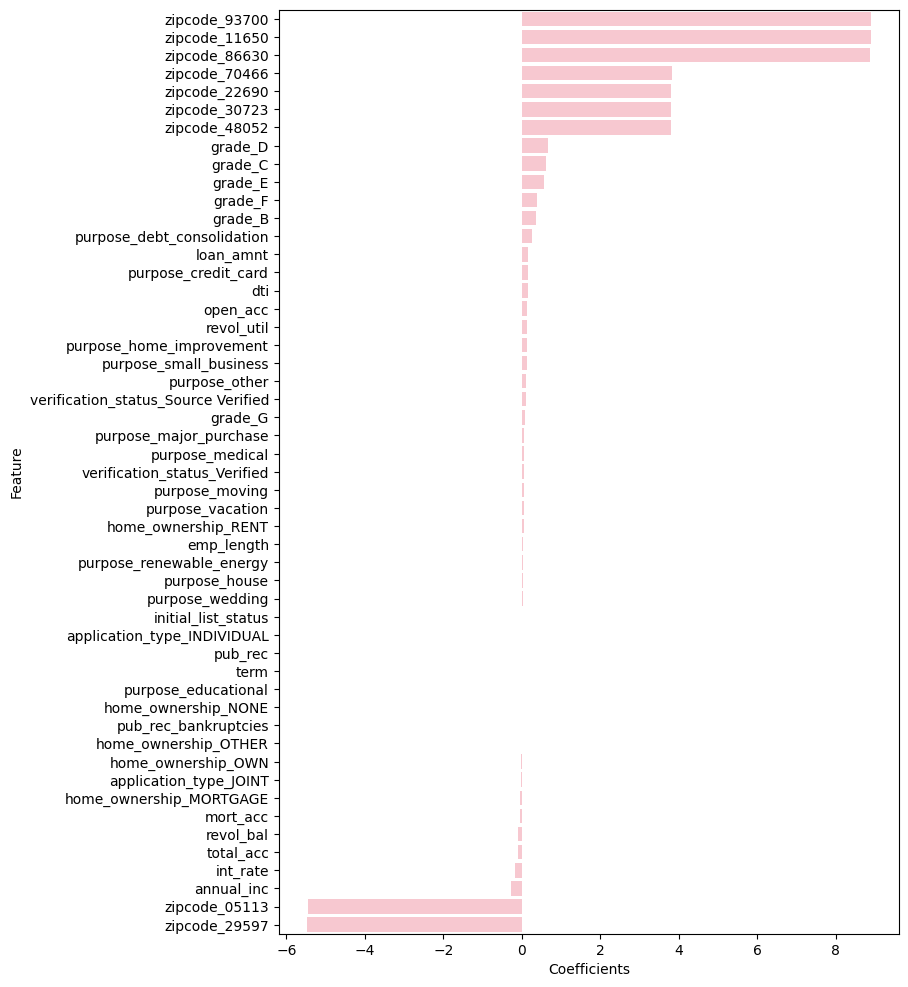

In [ ]:
plt.figure(figsize=(8,12))
sns.barplot(x='Coefficients', y='Feature', data=coef, color = 'pink')
plt.show()

#Insights

*  The features **zipcode_05113** and **zipcode_29597** have very low coefficient values compared to other features. This suggests that these zip codes have minimal impact on the model's predictions.

*  The remaining zip codes show high coefficient values, indicating a stronger influence on the probability of predicting unpaid loans.

*  Some other features, such as pub_rec, purpose_educational, home_ownership_NONE, pub_rec_bankruptcies, home_ownership_OTHER, and initial_list_status, have coefficients close to zero, implying they contribute very little to the model's predictions.

#K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

model = LogisticRegression(max_iter=1000, solver='lbfgs')

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score
cv_scores = cross_val_score(model, x_train_res, y_train_res, cv=kf, scoring='accuracy')

print("Cross_validation_score:", cv_scores)
print("Mean CV_score:", np.mean(cv_scores))

Cross_validation_score: [0.80377207 0.80612245 0.8043568  0.80450361 0.80479024]
Mean CV_score: 0.8047090330058394


#Insight

*  The cross-validation score is similar to the training accuracy, indicating that the model generalizes well and is likely to perform reliably on unseen or future data

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

model = LogisticRegression(max_iter=500, solver='liblinear')
param_dist = {'C': loguniform(0.001, 100)}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(x_train_res, y_train_res)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': np.float64(4.5705630998014515)}
Best Score: 0.8047388431040728


In [ ]:
c = 4.57
lamb = 1/c
print("Lambda:",round(lamb,2))

Lambda: 0.22


In [ ]:
best_model = random_search.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_p = best_model.predict(x_train_res)
print("Training Accuracy:",round(accuracy_score(y_train_res, y_p),2))

# Testing
y_te = best_model.predict(X_test_final)
print("Testing Accuracy:",round(accuracy_score(Y_test, y_te),2))

Training Accuracy: 0.8
Testing Accuracy: 0.8


# Insights

*  After hyperparameter tuning using RandomizedSearchCV, the best model with **C = 0.22** achieved **80% accuracy**, which is similar to both the training and cross-validation scores. This indicates that regularization has stabilized the model performance, and further tuning does not improve accuracy beyond this point.

**1. How can we make sure that our model can detect real defaulters and there are less false positives?**

*  To ensure the model can detect real defaulters while keeping false positives low, we focus on both recall and precision.

*  The high recall rate of **80%** ensures that most actual defaulters are correctly identified, minimizing missed risky borrowers. At the same time, the model maintains a low false positive rate, meaning very few fully paid customers are incorrectly classified as defaulters.

*  This trade-off between recall and precision should be carefully considered by the loan team to balance risk management with customer satisfaction.


**2. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.**

*  While NPAs (non-performing assets) are a real risk in the banking industry, choosing not to disburse loans to anyone would be too conservative and result in significant opportunity loss. The trade-off is between risk avoidance (minimizing defaults) and revenue generation (providing loans to creditworthy customers).

*  **True Positives (TP)**: correctly identifying defaulters helps reduce NPAs(risk) and protect the bank.

*  **False Negatives (FN)**: misclassifying actual defaulters as safe or fully paid increases NPAs, so this should be minimized.

*  **False Positives (FP)**: misclassifying good customers as defaulters causes lost opportunities and customer frustration — this should also be minimized.

*  **True Negatives (TN)**: correctly identifying safe customers allows the bank to lend responsibly and earn interest.


**What percentage of customers have fully paid their Loan Amount?**

In [ ]:
lo_st = (tap_df['loan_status'].value_counts(normalize=True)*100).round(2)
lo_st

,proportion
loan_status,
Fully Paid,80.55
Charged Off,19.45


#Insights

*  About **80.55%** of customers have fully repaid their loan amount, indicating a positive performance and strong repayment trend for LoanTap.

*  About 19% of have charged_off loans, meaning their loan amount were unpaid.

**2. Comment about the correlation between Loan Amount and Installment features**

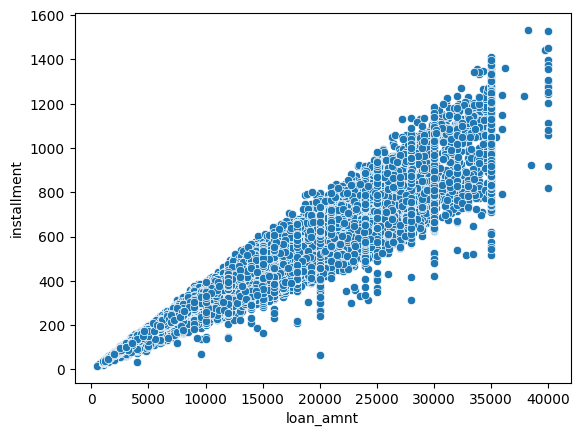

In [ ]:
sns.scatterplot(data=tap_df, x='loan_amnt', y='installment')
plt.show()

*  There is a strong positive correlation between loan amount and installment. As the loan amount increases, the installment amount also tends to increase.

**3. The majority of people have home ownership as** Mortgage.

In [ ]:
home = (tap_df['home_ownership'].value_counts(normalize=True)*100).round(2)
home

,proportion
home_ownership,
MORTGAGE,49.90
RENT,40.49
OWN,9.57
OTHER,0.03
ANY,0.00
NONE,0.00


**4. People with grades 'A' are more likely to fully pay their loan**--True

**5. Name the top 2 afforded job titles.**

*  The top employement title are **Manager and Teacher**.

**6. Thinking from a bank's perspective, which metric should our primary focus be on**

* ROC AUC
* Precision
* Recall
* F1 Score

* From a bank's perspective, which metric should our primary focus be on **Recall**.

*  The primary business goal is to identify unpaid (defaulting) customers correctly so that the bank can minimize credit risk and financial losses.

*  The recall for class 1 (unpaid) is 80%, which means the model correctly identifies 80% of actual defaulters.

*  Since the model shows a lower false negative count, there is a reduced chance of misclassifying unpaid (defaulter) customers as fully paid. Hence, the most important metric is **Recall (Sensitivity)**.


**7. How does the gap in precision and recall affect the bank?**

*  The model's precision and recall values for class 1 (unpaid/defaulters) are 48% and 80%, respectively.

*  **Low precision (48%)** means that many customers who actually repaid their loans (fully paid) are being incorrectly classified as defaulters.
   *  This can lead to false alarms, where good customers are treated as risky borrowers. Also frustration and potential financial loss for those customers.
   *  As a result, such customers may lose trust in the bank, face unnecessary rejections, or even move to competitors — causing reputational and customer retention loss for the bank. Additionally, it may reduce investor confidence.

*  **High recall (80%)** indicates that most of the actual defaulters are correctly identified.
   *  This reduces the number of false negatives and minimizing financial losses due to missed risky customers.
   *  However the model is trying hard to catch all defaulters (high recall), but in doing so, it also wrongly marks some genuine customers as defaulters (low precision).

**8. Which were the features that heavily affected the outcome?**

*  Feature zipcode is heavily affect the outcome follwed by loan amount, grade, dti, purpose.

**9. Will the results be affected by geographical location?**

* **Yes**, the results are affected by geographical location. The ZIP code feature has a strong positive coefficient, meaning it heavily influences the model's predictions.



#Recommendation

*  Approving more short-term loans (e.g., 36 months) can help reduce credit risk, as such applicants tend to borrow smaller amounts and are more likely to repay on time. This minimizes the chances of defaults and helps maintain a healthier loan portfolio with fewer NPAs.

*  Encourage joint loan applications, especially for higher-value or business loans. Joint loans distribute repayment responsibility between co-applicants, reducing the risk of default for the bank. This approach ensures better loan recovery and lowers overall credit risk compared to individual loans.

*   To minimize customer dissatisfaction and revenue loss, the bank should monitor and adjust the model's classification threshold to reduce false positives. Additionally, periodic evaluation of model performance using precision-recall metrics will help ensure genuine customers are correctly identified while still detecting potential defaulters.

*  To reduce defaulters, the loan approval process should not rely solely on NPAs. Other factors such as ZIP code and credit grade should also be considered, as they strongly influence repayment behavior. For example, customers with higher grades(B, C) and certain ZIP codes are more likely to repay their loans.

*  Since the PR curve value is 0.76, to further improve model performance, the team can focus on appropriate feature selection or consider other techniques such as Random Forest or Decision Tree models to enhance precision without compromising recall.


